In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [25]:
telecom_cust = pd.read_csv('Telco_Customer_Churn.csv')

In [26]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [30]:
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [31]:
#Removing missing values

telecom_cust.dropna(inplace = True)

In [32]:

df2 = telecom_cust.iloc[:,1:]

In [33]:

df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [34]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


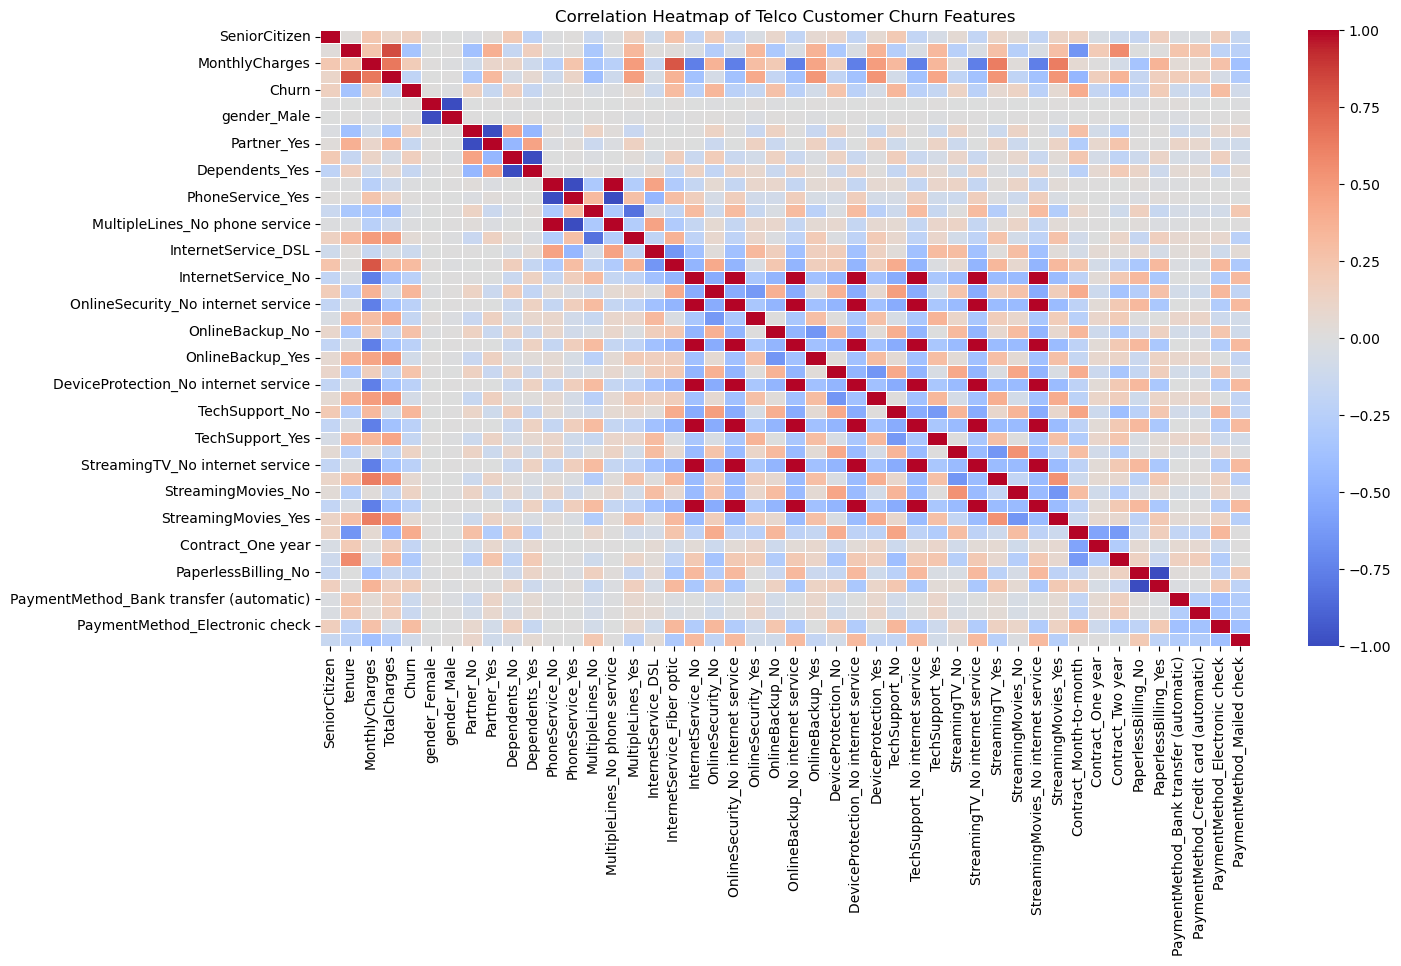

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df_dummies.corr(), cmap='coolwarm', linewidths=0.5, annot=False)
plt.title("Correlation Heatmap of Telco Customer Churn Features")
plt.show()

Data Exploration

A) Demographic
Gender, Age Range, Partner and Dependent status


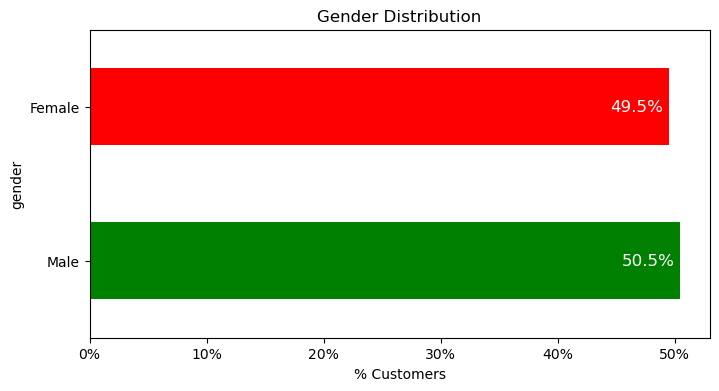

In [36]:

plt.figure(figsize=(8,4))
gender_counts = telecom_cust['gender'].value_counts()
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='barh',
    color=['green', 'red']
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('% Customers')
ax.set_title('Gender Distribution')

for bar, count in zip(ax.patches, gender_counts):
    percentage = count / gender_counts.sum() * 100
    ax.text(
        bar.get_width() - 5,
        bar.get_y() + bar.get_height() / 2,
        f'{percentage:.1f}%',
        color='white',
        fontsize=12,
        va='center'
    )

plt.show()

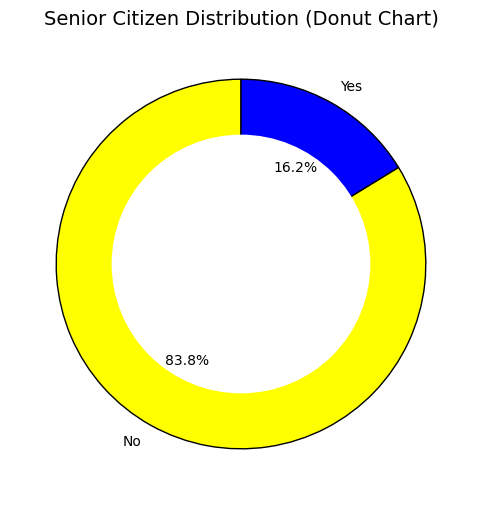

In [37]:
#2 Senior Citizen (%)

senior_counts = telecom_cust['SeniorCitizen'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    senior_counts,
    labels=['No', 'Yes'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['yellow', 'blue'],
    wedgeprops={'edgecolor':'black'}
)

# Donut hole
centre = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre)

plt.title("Senior Citizen Distribution (Donut Chart)", fontsize=14)
plt.show()

B) Customer Account Information

PaperlessBilling

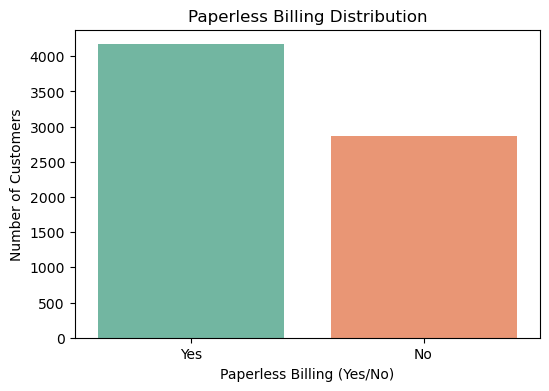

In [38]:

plt.figure(figsize=(6,4))
sns.countplot(x='PaperlessBilling', data=telecom_cust, palette='Set2')

plt.title("Paperless Billing Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Paperless Billing (Yes/No)")
plt.show()

In [39]:
#PaymentMethod

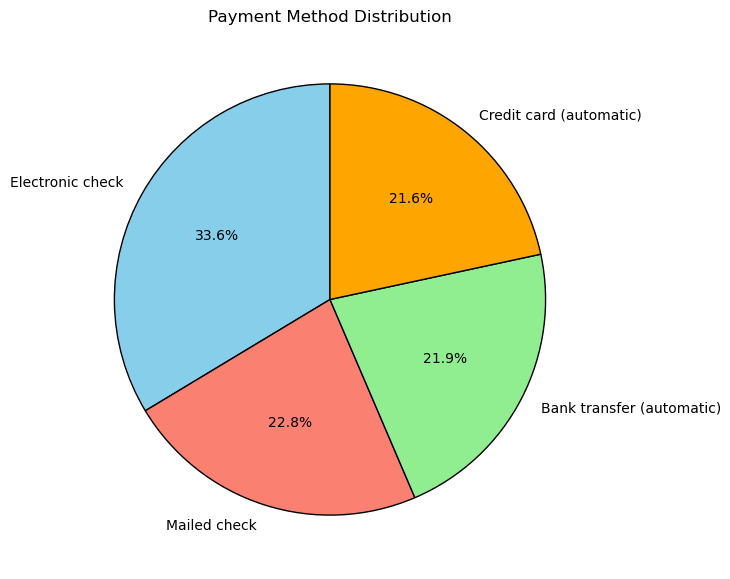

In [40]:
payment_counts = telecom_cust['PaymentMethod'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    payment_counts,
    labels=payment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon', 'lightgreen', 'orange'],
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Payment Method Distribution")
plt.show()

C) Services Used by Customers

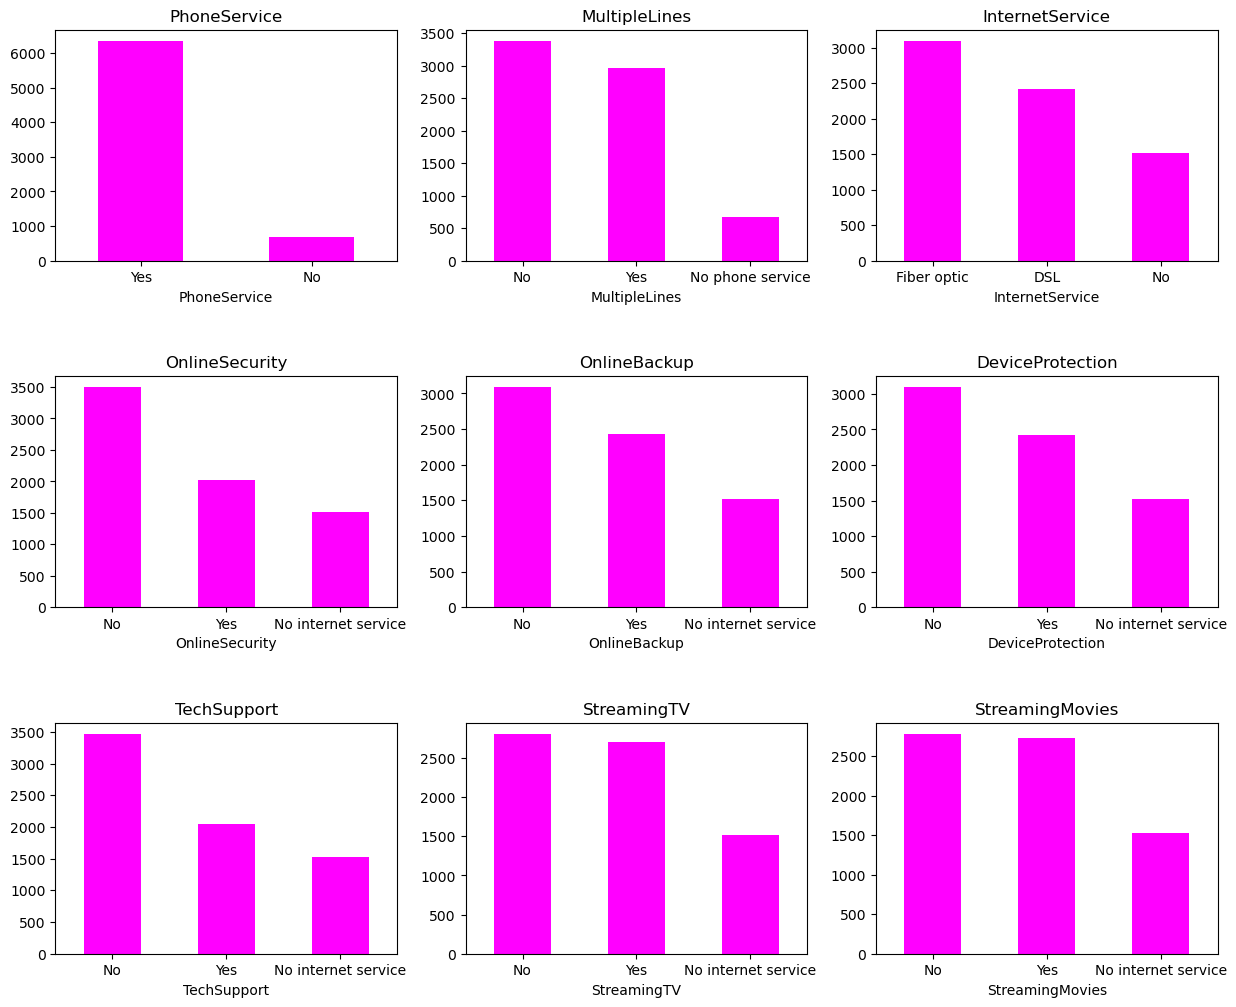

In [41]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Calculate row and column index

    ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0,color='Magenta')
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Rotate x-axis labels for better readability

plt.show()

D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

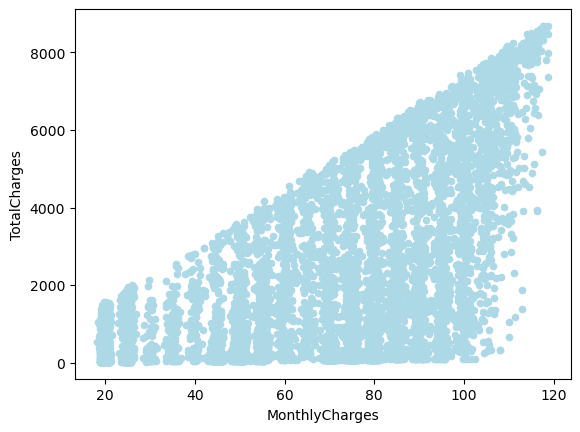

In [42]:
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'lightblue')


E) Relationship between dependent variable (Churn) & other important

 Payment Method vs Churn

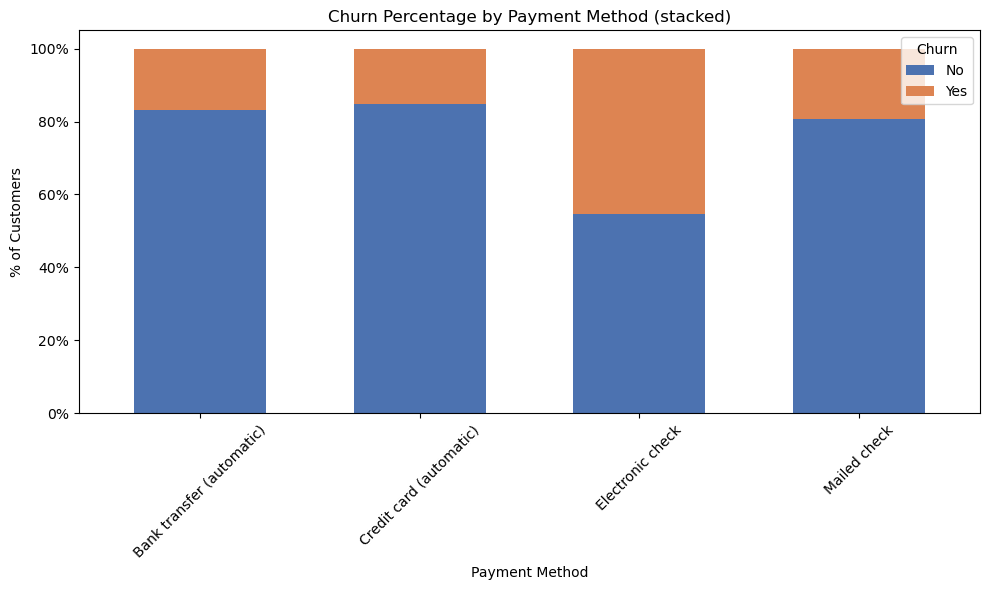

In [43]:
telecom_cust.columns = telecom_cust.columns.str.strip()

# group and pivot
contract_churn = telecom_cust.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# convert to percentages by row
contract_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

# plot stacked bar
ax = contract_pct.plot(kind='bar', stacked=True, figsize=(10,6), width=0.6, rot=45,
                       color=['#4c72b0', '#dd8452'])   # color order = [No, Yes] if Churn order is No then Yes

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Customers')
ax.set_xlabel('Payment Method')
ax.set_title('Churn Percentage by Payment Method (stacked)')
ax.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

Paperless Billing vs Churn


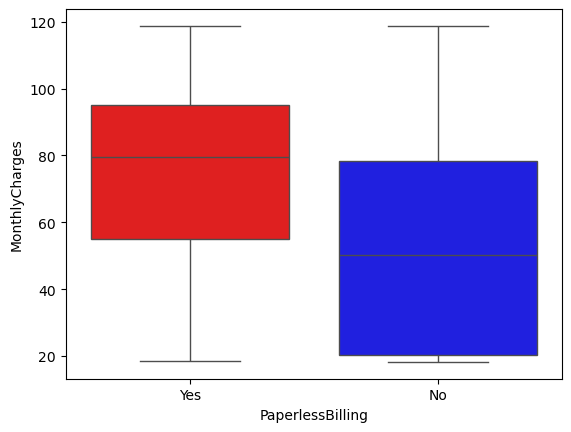

In [44]:
sns.boxplot(
    x='PaperlessBilling',
    y='MonthlyCharges',
    data=telecom_cust,
    palette=['red', 'blue']
)
plt.show()

In [46]:
#totalCharges vs Churn

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(
    x='Churn',
    y='TotalCharges',
    data=telecom_cust,
    palette=['lightcoral', 'skyblue']
)
plt.title("Total Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

  linear Regression

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

NameError: name 'LogisticRegressionn' is not defined